### 1. Define mean shift clustering?

MSC groups points among local maximums. This is repeated iteratively and all points move to the cluster centers. The points are filtered to remove near-duplicates to form the final set of centroids. The algorithm automatically determines the number of clusters. The downside of MSC is computational complexity at $O(N^2)$

In [1]:
### 2. Implement mean shift from the ground up. 

%matplotlib inline
import random as rnd
import numpy as np
import math

import matplotlib.pyplot as plt

# from scipy import stats

In [2]:
def is_same_point(p1, p2):
    return math.isclose(p1[0], p2[0], abs_tol=0.001) and math.isclose(p1[1], p2[1], abs_tol=0.001)
    
# Gets euclidiance distance b/w two points
def distance(p1, p2):
    return math.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)  

# Gets all neighbours within the given threshold for the specified point
def get_neighbours(point, all_points, dist_threshold):
    result = [];
    for p in all_points:
        dist = distance(point, p)
        if (dist <= dist_threshold):
            result.append(p)
    return result

# Gets weight for the given distance using gaussian kernel
def get_weight(distance, bandwidth):
    d = np.sqrt(distance)**2
    result = (1/(bandwidth*math.sqrt(2*math.pi))) * np.exp(-0.5*((d / bandwidth))**2)
    return result

# Gets weighted average for the specified point
def get_weighted_average(point, points, bandwidth):
    shift_x = 0.0
    shift_y = 0.0
    scale_factor = 0.0
    
    for p in points:
        weight = get_weight(distance(point, p), bandwidth)
        shift_x += p[0] * weight
        shift_y += p[1] * weight
        scale_factor += weight
    shift_x = shift_x / scale_factor
    shift_y = shift_y / scale_factor
    return [shift_x, shift_y]

def lists_of_points_equal(list1, list2):
    if (len(list1) != len(list2)):
        return False
    for i in range(len(list1)):
        if not is_same_point(list1[i], list2[i]):
            return False
    return True

def unique(X):
    X_unique = []
    for x in X:
        is_found = False
        for y in X_unique:
            if is_same_point(x, y):
                is_found = True
                break
        if not is_found:
            X_unique.append(x)
    return X_unique

def msc(X, bandwidth):
    while True:
        X_tmp = []
        for x in X:
            # find all possible neighbors within certain distance.
            neighbors = get_neighbours(x, X, bandwidth)
            if len(neighbors) == 0:
                X_tmp.append(x)
            else:
                # Calculate the weighted average of the group of neighbors.
                weighted_average = get_weighted_average(x, neighbors, bandwidth)
                # Replace the point with the weighted average of its neighbors
                X_tmp.append(weighted_average)
        # Repeat 1. until the points and their averages are the same,
        # or until certain stop condition is achieved
        if lists_of_points_equal(X, X_tmp):
            break
        else:
            X = unique(X_tmp)
    return unique(X_tmp)

### 3. Use the make_blob function from previous assignment for testing. 

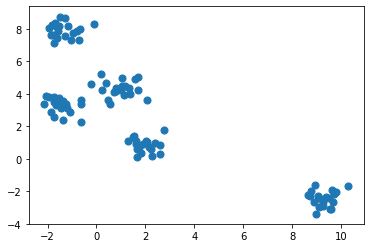

In [3]:
from sklearn.datasets.samples_generator import make_blobs
center = rnd.randint(2, 10)
cluster_std = 0.01 + (rnd.random() * (0.99 - 0.01))
X, y = make_blobs(n_samples=100, centers=center,
                  random_state=0, cluster_std=cluster_std)

plt.scatter(X[:, 0], X[:, 1], s=50);

[[-1.37788045  7.89509527]
 [-1.46576146  3.27979759]
 [ 0.96992038  4.3075048 ]
 [ 9.27974003 -2.44701026]
 [ 1.9508701   0.8187166 ]]


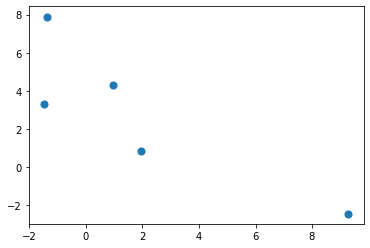

In [4]:
centroids = np.array(msc(X, 1.0))
print(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], s=50);